Crea un programa (“3_a_histogram_sales_short_long_delays.py”) que construya una visualización que permita comparar los histogramas de las ventas de órdenes completas que tuvieron retrasos moderados y prolongados. La imagen resultante del programa deberá denominarse “3_a_histogram_sales_short_long_delays.png”.

In [1]:
#Preparando el ambiente
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leyendo los datos
datos = pd.read_csv("oilst_processed.csv")

In [3]:
pd.set_option('display.max_columns', None)
datos.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,month,quarter,year_month,delta_days,delay_status,total_products,total_sales,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,10,2017Q4,2017-10,-7.107488,on_time,1.0,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,SP,São Paulo
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,7,2018Q3,2018-07,-5.355729,on_time,1.0,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,BA,Bahia
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,8,2018Q3,2018-08,-17.245498,on_time,1.0,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,GO,Goiás
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,11,2017Q4,2017-11,-12.980069,on_time,1.0,45.00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,RN,Rio Grande do Norte
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,2,2018Q1,2018-02,-9.238171,on_time,1.0,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP,SP,São Paulo


In [4]:
datos.delay_status.unique()

array(['on_time', 'short_delay', 'long_delay'], dtype=object)

In [5]:
#Filtrando datos
datos = datos[datos['order_status'] == 'delivered']
datos = datos[(datos['delay_status']== 'long_delay') | (datos['delay_status'] == 'short_delay')]

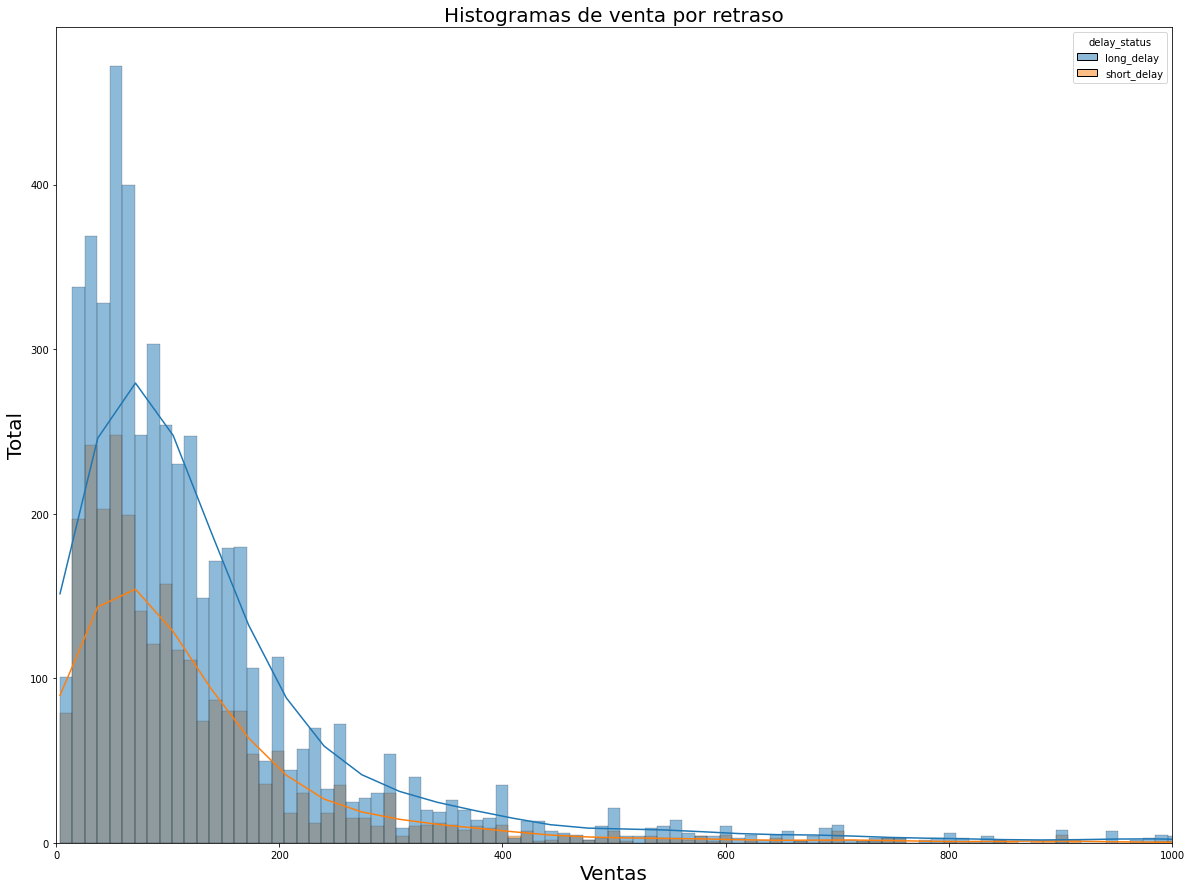

In [7]:
#Creando el gráfico

plt.figure(figsize=(20,15))
sns.histplot(data=datos, x='total_sales', hue='delay_status', kde =True)

#Se establece un límite para mejorar la visualización
plt.xlim(0,1000)

#Agregando etiquetas y título
plt.xlabel("Ventas", fontsize=20)
plt.ylabel("Total", fontsize=20)
plt.title("Histogramas de venta por retraso", fontsize=20)

#Guardando la figura
plt.savefig("3_a_histogram_sales_short_long_delays.png")
plt.show()